### Phase Flip Code

HXH = Z and HZH = X 

So applying hadamards to the encoding part of the circuit from the bit flip code. Refer to the Bit Flip code which is in the same repository

### Phase Flip Code Simplest version

HXH = Z and HZH = X 

So applying hadamards to the encoding part of the circuit from the bit flip code. Refer to the Bit Flip code which is in the same repository

In [430]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit_ibm_runtime import *
from qiskit_ibm_runtime import EstimatorV2
from qiskit_aer.primitives import Estimator

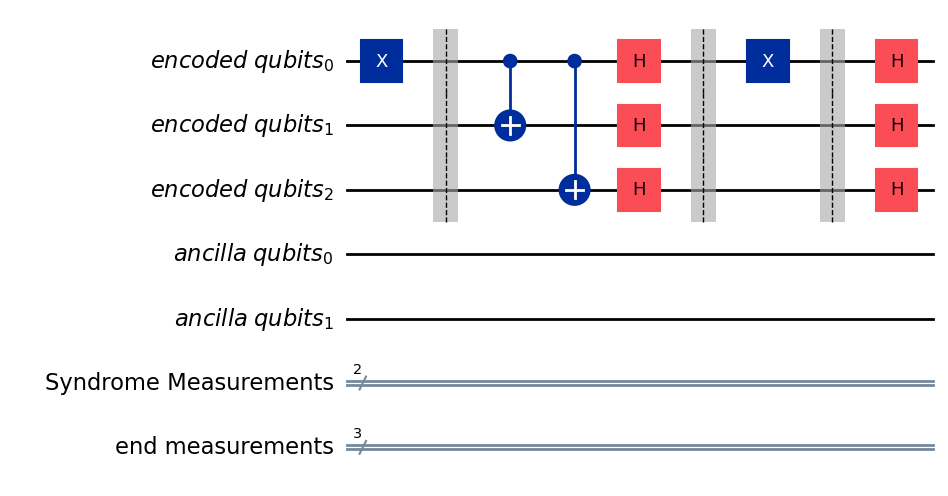

In [431]:
q = QuantumRegister(3, "encoded qubits")
a = QuantumRegister(2, "ancilla qubits")

s = ClassicalRegister(2, "Syndrome Measurements")
m = ClassicalRegister(3, "end measurements")

qc = QuantumCircuit(q,a,s,m)

# State Preparation
qc.x(0)
qc.barrier([0,1,2])

# Encoding
qc.cx(0,1)
qc.cx(0,2)
qc.h(0)
qc.h(1)
qc.h(2)
qc.barrier([0,1,2])

# Error Channel
qc.x(0)                  # Apply X on a different qubit to see the change in circuit and other variables
qc.barrier([0,1,2])

# Converting the error channel to Phase Flip error
qc.h(0)
qc.h(1)
qc.h(2)

qc.draw(output='mpl')

In [432]:
# Syndrome Measurements

a = QuantumRegister(2)
c = ClassicalRegister(2)

qc.cx(0,3)
qc.cx(1,3)
qc.cx(1,4)
qc.cx(2,4)

qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()
qc.measure(3,0)
qc.measure(4,1)

Clbit(ClassicalRegister(2, 'Syndrome Measurements'), 0)
Clbit(ClassicalRegister(2, 'Syndrome Measurements'), 1)
ClassicalRegister(2, 'Syndrome Measurements')


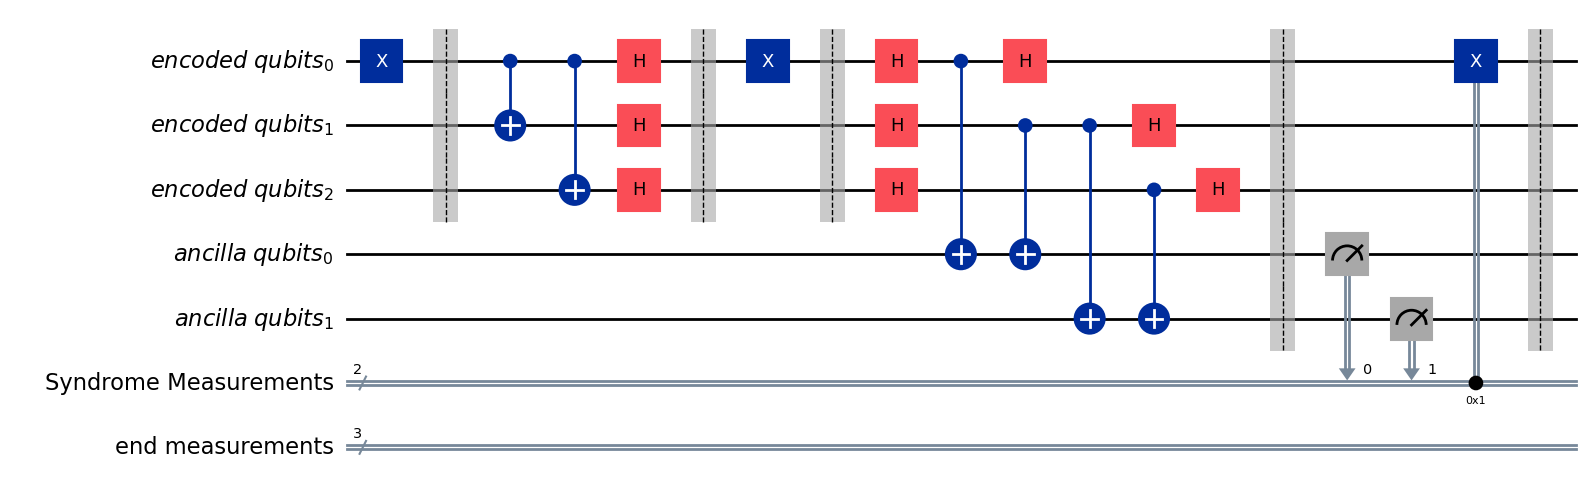

In [433]:
# Recovery
i = s[0]
j = s[1]

print(i)
print(j)
print(s)
qc.x(q[0]).c_if(s, 1)
#qc.x(q[2]).c_if(s, 2)
#qc.x(q[1]).c_if(s, 3)

'''        
if s[0]==0 and s[1]==1:
    print("0 and 1")
    qc.x(0)
    
elif a[0]==1 and a[1]==0:
    qc.x(2)
    
elif a[0]==1 and a[1]==1:
    qc.x(1)
    '''
qc.barrier()
qc.draw(output='mpl')


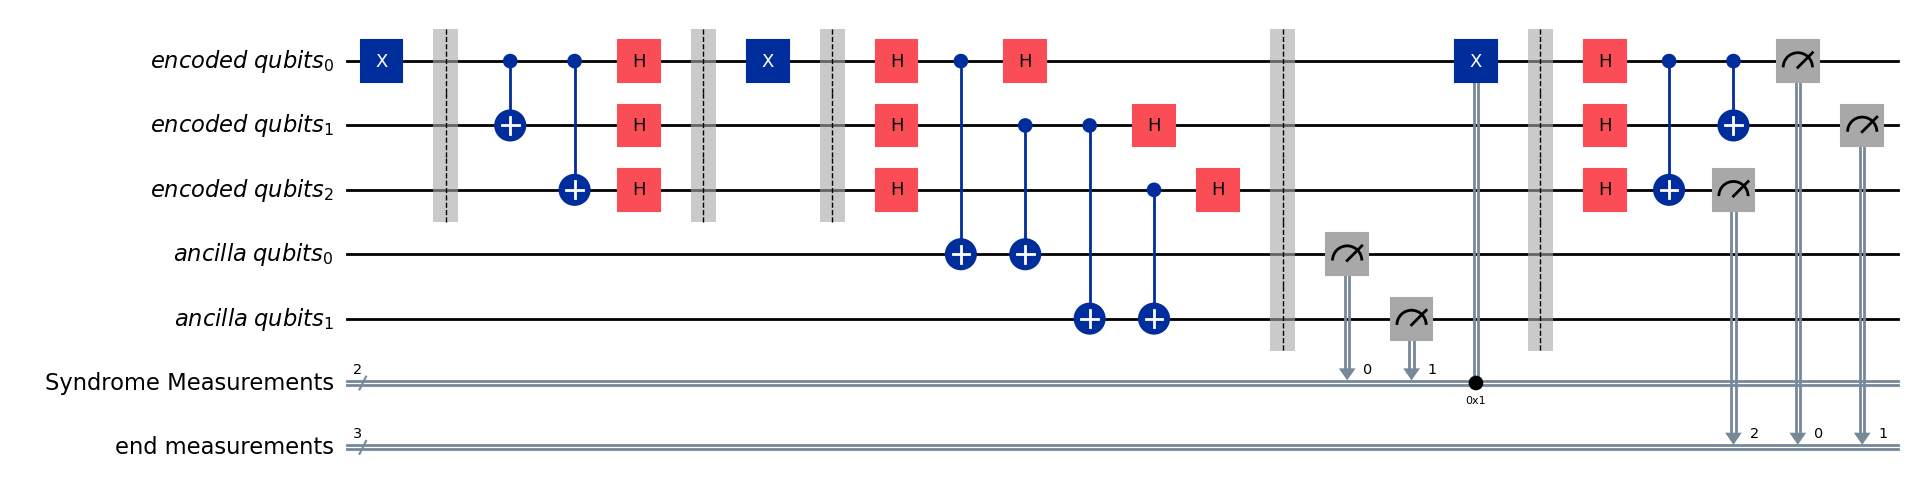

In [434]:
# Decoding
qc.h(0)
qc.h(1)
qc.h(2)
qc.cx(0,2)
qc.cx(0,1)

qc.measure(0,2)
qc.measure(1,3)
qc.measure(2,4)


qc.draw(output='mpl')

{'001 00': 8192}


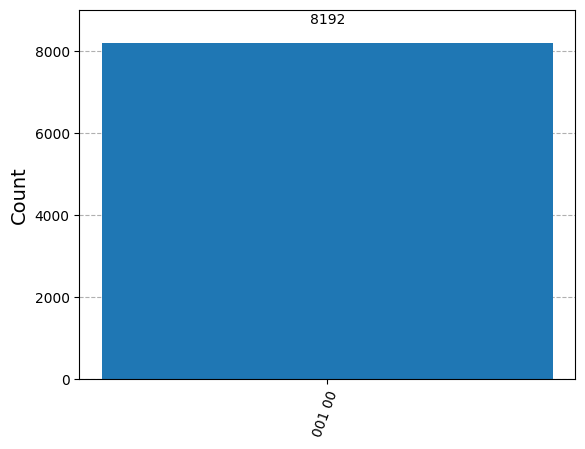

In [435]:
# Measurement

from qiskit_aer import AerSimulator

backend = AerSimulator()

job = backend.run(qc, backend=backend, shots=8192)


result = job.result()

dist = result.get_counts()
print(dist)
plot_histogram(dist)